##British Airways Sentiment Analysis
### Scraping data from Skytrax

In [236]:
#importing all the required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [237]:
#scraping data fron skytrax
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []
stars = []
date = []
country = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    for para in parsed_content.find_all("time"):
        date.append(para.get_text())   
    
    print(f"   ---> {len(reviews)} total reviews")
    print(f"   ---> {len(date)} total date")

Scraping page 1
   ---> 100 total reviews
   ---> 100 total date
Scraping page 2
   ---> 200 total reviews
   ---> 200 total date
Scraping page 3
   ---> 300 total reviews
   ---> 300 total date
Scraping page 4
   ---> 400 total reviews
   ---> 400 total date
Scraping page 5
   ---> 500 total reviews
   ---> 500 total date
Scraping page 6
   ---> 600 total reviews
   ---> 600 total date
Scraping page 7
   ---> 700 total reviews
   ---> 700 total date
Scraping page 8
   ---> 800 total reviews
   ---> 800 total date
Scraping page 9
   ---> 900 total reviews
   ---> 900 total date
Scraping page 10
   ---> 1000 total reviews
   ---> 1000 total date
Scraping page 11
   ---> 1100 total reviews
   ---> 1100 total date
Scraping page 12
   ---> 1200 total reviews
   ---> 1200 total date
Scraping page 13
   ---> 1300 total reviews
   ---> 1300 total date
Scraping page 14
   ---> 1400 total reviews
   ---> 1400 total date
Scraping page 15
   ---> 1500 total reviews
   ---> 1500 total date
Scrapin

In [238]:
data = {"date":date,"reviews":reviews}
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()
df.head()

,date,reviews
0,12th March 2023,✅ Trip Verified | The usual shambolic unfoldi...
1,12th March 2023,Not Verified | Lost my case and took 6 weeks ...
2,10th March 2023,✅ Trip Verified | The incoming and outgoing f...
3,10th March 2023,✅ Trip Verified | Back in December my family ...
4,10th March 2023,✅ Trip Verified | As usual the flight is dela...


In [239]:
# downloading file
df.to_csv("BA_reviews.csv")

### Data Cleaning

In [240]:
# importing data
data = pd.read_csv('/content/BA_reviews.csv')

In [241]:
data.head()

,Unnamed: 0,date,reviews
0,0,12th March 2023,✅ Trip Verified | The usual shambolic unfoldi...
1,1,12th March 2023,Not Verified | Lost my case and took 6 weeks ...
2,2,10th March 2023,✅ Trip Verified | The incoming and outgoing f...
3,3,10th March 2023,✅ Trip Verified | Back in December my family ...
4,4,10th March 2023,✅ Trip Verified | As usual the flight is dela...


In [242]:
data = data.drop(['Unnamed: 0'], axis=1)

In [243]:
data.sample()

,date,reviews
845,10th November 2018,✅ Trip Verified | Business Class space is rid...


In [244]:
#removing trip/not varified text
data.reviews = data.reviews.str.strip("✅ Trip Verified |")
data.reviews = data.reviews.str.strip("✅ Not Verified |")

In [245]:
data.head()

,date,reviews
0,12th March 2023,he usual shambolic unfolding that BA has now u...
1,12th March 2023,Lost my case and took 6 weeks to locate it and...
2,10th March 2023,he incoming and outgoing flight was delayed be...
3,10th March 2023,Back in December my family and I as we were ge...
4,10th March 2023,"As usual the flight is delayed this week, it a..."


In [246]:
# removing all special characters and numericals leaving the alphabets
def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [247]:
data['cleaned_reviews'] = data['reviews'].apply(clean_text)

In [248]:
# removing all punctuation
def removingpunct(text):
  for punct in string.punctuation:
      text = text.replace(punct, '')
  return text

In [249]:
data['cleaned_reviews'] = data['cleaned_reviews'].apply(removingpunct)

In [250]:
# removing all Stopwords
def removingstopword(text):
  stopword=nltk.corpus.stopwords.words('english')
  stopword.remove('not')
  a=[w for w in nltk.word_tokenize(text) if w not in stopword]
  return ' '.join(a)

In [251]:
data['cleaned_reviews'] = data['cleaned_reviews'].apply(removingstopword)

In [252]:
# converting text into lowercase 
data['cleaned_reviews'] = data['cleaned_reviews'].apply(str.lower)

In [253]:
data.head()

,date,reviews,cleaned_reviews
0,12th March 2023,he usual shambolic unfolding that BA has now u...,usual shambolic unfolding ba unfortunately com...
1,12th March 2023,Lost my case and took 6 weeks to locate it and...,lost case took weeks locate still not replied ...
2,10th March 2023,he incoming and outgoing flight was delayed be...,incoming outgoing flight delayed french air tr...
3,10th March 2023,Back in December my family and I as we were ge...,back december family i getting onto plane refu...
4,10th March 2023,"As usual the flight is delayed this week, it a...",as usual flight delayed week already hours i h...


In [254]:
# converting date column into datetime format
data['date'] = pd.to_datetime(data.date)

In [255]:
# creating new year column
data['year'] = data['date'].dt.strftime('%Y')

In [256]:
data.head()

,date,reviews,cleaned_reviews,year
0,2023-03-12,he usual shambolic unfolding that BA has now u...,usual shambolic unfolding ba unfortunately com...,2023
1,2023-03-12,Lost my case and took 6 weeks to locate it and...,lost case took weeks locate still not replied ...,2023
2,2023-03-10,he incoming and outgoing flight was delayed be...,incoming outgoing flight delayed french air tr...,2023
3,2023-03-10,Back in December my family and I as we were ge...,back december family i getting onto plane refu...,2023
4,2023-03-10,"As usual the flight is delayed this week, it a...",as usual flight delayed week already hours i h...,2023


In [257]:
#re-arranging data
data =data[['date','year','reviews','cleaned_reviews']]

In [258]:
data.head()

,date,year,reviews,cleaned_reviews
0,2023-03-12,2023,he usual shambolic unfolding that BA has now u...,usual shambolic unfolding ba unfortunately com...
1,2023-03-12,2023,Lost my case and took 6 weeks to locate it and...,lost case took weeks locate still not replied ...
2,2023-03-10,2023,he incoming and outgoing flight was delayed be...,incoming outgoing flight delayed french air tr...
3,2023-03-10,2023,Back in December my family and I as we were ge...,back december family i getting onto plane refu...
4,2023-03-10,2023,"As usual the flight is delayed this week, it a...",as usual flight delayed week already hours i h...


### Data Analysis

In [259]:
data.shape

(3493, 4)

In [260]:
data.isnull().sum()

date               0
year               0
reviews            0
cleaned_reviews    0
dtype: int64

Dropping year 2011 and 2012 because of less data. 

In [261]:
data = data[data.year != '2011']
data = data[data.year != '2012']


Since 2023 is incomplete, let's strip it off for the current analysis

In [262]:
data = data[data.year != '2023']

In [263]:
print("Total Number of reviews",data.cleaned_reviews.count())

Total Number of reviews 3432


In [264]:
# creating line chart for reviews count per year
yrl = data[['year','reviews']].groupby('year').count().sort_values('year',ascending  = True).reset_index()
fig = px.line(yrl, x = 'year', y = 'reviews', width = 800, height = 400, template = 'plotly_white')
fig.update_layout(title_text='Reviews Count per Year', title_x=0.5)
fig.update_traces(line_color=px.colors.qualitative.Bold[2])
fig.update_layout(margin = dict(l=10, r=20, t=40, b=20), yaxis_title=None, xaxis_title=None)
fig.show()

### Sentiment Analysis

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.
VADER sentiment tells if the statement is positive or negative.

In [265]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [266]:
#checking compund values for cleaned text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_score= SentimentIntensityAnalyzer()
data['compound'] = [vader_score.polarity_scores(x)['compound'] for x in data['cleaned_reviews']]
data.head()

,date,year,reviews,cleaned_reviews,compound
46,2022-12-30,2022,When will BA update their Business class cabin...,when ba update business class cabin across it ...,0.2718
47,2022-12-29,2022,Paid £200 day before flight for an upgrade fro...,paid day flight upgrade economy premium econom...,-0.5267
48,2022-12-29,2022,BA website did not work (weirdly deleted my fl...,ba website not work weirdly deleted flight upc...,-0.5175
49,2022-12-29,2022,Absolutely terrible experience with British Ai...,absolutely terrible experience british airways...,-0.3993
50,2022-12-28,2022,ancouver to Delhi via London. We were booked t...,ancouver delhi via london we booked fly vancou...,-0.9853


In [267]:
# function to analyse
def analysingscore(score):
  if score < 0:
    return 'Negative'
  if score== 0:
    return 'Neutral'
  else:
    return 'Positive'

In [268]:
data['result']=data['compound'].apply(analysingscore)

In [269]:
data.head()

,date,year,reviews,cleaned_reviews,compound,result
46,2022-12-30,2022,When will BA update their Business class cabin...,when ba update business class cabin across it ...,0.2718,Positive
47,2022-12-29,2022,Paid £200 day before flight for an upgrade fro...,paid day flight upgrade economy premium econom...,-0.5267,Negative
48,2022-12-29,2022,BA website did not work (weirdly deleted my fl...,ba website not work weirdly deleted flight upc...,-0.5175,Negative
49,2022-12-29,2022,Absolutely terrible experience with British Ai...,absolutely terrible experience british airways...,-0.3993,Negative
50,2022-12-28,2022,ancouver to Delhi via London. We were booked t...,ancouver delhi via london we booked fly vancou...,-0.9853,Negative


In [270]:
result = data[['result','reviews']].groupby('result').count().sort_values('reviews',ascending  = False).reset_index()
result

,result,reviews
0,Positive,2196
1,Negative,1224
2,Neutral,12


In [271]:
#creating bar chart.
fig = px.bar(result,y='reviews', x= 'result',template = 'plotly_white',width=700, height=400,color='result')
fig.update_layout(showlegend=False, yaxis_title=None, xaxis_title=None,xaxis_showgrid=False, yaxis_showgrid=False)
fig.show()

In [272]:
timeline = data[['year','result','reviews']].groupby(['year','result']).count().sort_values('year',ascending  = True).reset_index()
timeline  = timeline[timeline.result != 'Neutral']
timeline.head()

,year,result,reviews
0,2014,Negative,123
2,2014,Positive,343
3,2015,Negative,236
5,2015,Positive,500
6,2016,Negative,189


In [273]:
fig = px.line(timeline, x='year', y="reviews",color="result", width=1200, height=400, template = 'plotly_white',color_discrete_sequence=["#cd4545", "#22559c"])
fig.update_layout(title_text='Positive and Negative review count per year', title_x=0.5)
fig.update_layout(showlegend=False, yaxis_title=None, xaxis_title=None,margin = dict(l=20, r=20, t=40, b=20))
for i, d in enumerate(fig.data):
    fig.add_scatter(x=[d.x[-1]], y = [d.y[-1]],
                    mode = 'markers+text',
                    text = d.legendgroup,
                    textfont = dict(color=d.line.color, size=12),
                    textposition='middle right',
                    marker = dict(color = d.line.color, size = 8),
                    legendgroup = d.name,)
fig.show()

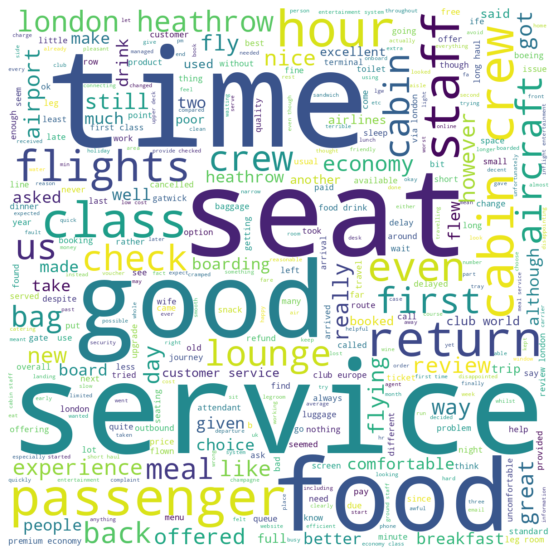

In [274]:
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(data.cleaned_reviews)
stopwords = set(stopwords.words('english'))
#stopwords.update(["ba","flight", "british","airways", "airline","plane", "told","also", "could","would","want","get","lhr","u"])
stopwords.update(["ba","flight", "british","airways", "airline","plane", "told","also", "could","would","want","get","lhr","u","business",
                  "seats","one"])
wordcloud = WordCloud(height=400,width=400,max_font_size=100, max_words=500, stopwords=stopwords,scale=3,random_state=1,
                      background_color='white').generate(reviews)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [275]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(10)

#create a dataframe of these word and its frequencies
all_fdist = pd.DataFrame.from_dict(nlp_words)
all_fdist
fig = px.bar(all_fdist, x=0, y=1,template = 'plotly_white',width=800, height=600)
fig.update_layout(showlegend=False, yaxis_title=None, xaxis_title=None,xaxis_showgrid=False, yaxis_showgrid=False)
fig.show()

The commonly discussed topics were "service"," food", "seats", and "crew". Customers often shared their experiences related to these four aspects of the airline, including their satisfaction levels, complaints, and suggestions for improvement.

In [276]:
# downloading file for tableau visualisation
data.to_csv("reviews.csv")